<a href="https://colab.research.google.com/github/dilanHewawitharana/TensorFlow-2.0-Self-Learning/blob/main/08_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym   # all you have to do to import and use open ai gym!

In [2]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [12]:
action = env.action_space.sample()  # get a random action 

In [13]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [14]:
print(new_state)
print(reward)
print(done)
print(info)

0
0.0
False
{'prob': 0.3333333333333333}


In [15]:
env.render()   # render the GUI for the enviornment 

  (Left)
SFFF
FHFH
FFFH
HFFG


In [16]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [17]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [24]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

In [26]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

In [28]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [29]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[5.15951926e-01 5.98719730e-03 5.94890240e-03 5.93081059e-03]
 [1.50250706e-03 1.17084195e-03 4.43885691e-03 2.85512877e-01]
 [3.34120291e-03 2.97808340e-03 1.58427254e-03 3.04939851e-01]
 [2.37321053e-03 1.04930996e-03 1.58353043e-03 1.36901059e-01]
 [4.07002402e-01 2.16174607e-03 1.11395930e-03 2.17782854e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.44891062e-03 1.29108012e-04 1.56373846e-04 1.03714576e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.97594403e-03 3.54485214e-03 3.88190388e-03 5.10099887e-01]
 [8.50381016e-04 1.71654577e-01 3.16624402e-03 7.21550966e-04]
 [7.63826383e-01 8.36740294e-04 9.77075804e-04 6.21772240e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.53675319e-02 5.35780044e-02 8.20697652e-01 4.17324863e-03]
 [2.04663343e-01 9.92667775e-01 2.40664430e-01 2.42484072e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

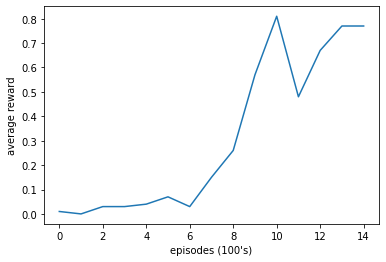

In [30]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()